#### Decision Tree

A <b>Decision Tree</b> is a data-structure consisting of a hierachy of nodes. Each node is a point that either ask question or indicates a prediction.

<b>Tree Structure:</b>
Decision Trees are hierarchical in nature and have tree structure which consists of a 
- Root node
- Branches
- Internal nodes 
- leaf nodes.

<b>How does the Decision Tree model works?</b>

Stage 1: Building phase

From the <b>Root node</b> of a Decision Tree, the model is now learning which are the features and targets that have been assigned to it. At this stage the tree will ask a binary question(Yes or No) when we split the root node into internal nodes. The algorithm, calculates an Entropy value. The Entropy value (uncertainty/unpredictability component) is usually high since,at this point the model holds a mixture of classes/target variable and need to be further split to be able to classify those classes. The root node is known to be impure.

Stage 2: Learning Phase

As the tree is being split into subsequent nodes called <b>Internal nodes</b>, the model is now learning the relationship between the features and the target variable and can lower its uncertainty. The model is said to be decreasing its entropy value (uncertainty) and increasing the information gain from each node in the tree. Information Gain is simply the measure of the decrease in uncertainty/Entropy in each node. The nodes that have been confirmed as 100% classified, will be automatically considered as the leaf node and will no longer be split. The model will recursively continue splitting the other internal nodes that haven't been fully classified.


Stage 3: Decision/Prediction Phase

At this stage, after the tree has been split to its maximum depth, the entropy is expected to be at its lowest or equal to 0, therefore increasing the purity of each nodes. These new nodes are then called <b>Leaf nodes</b>. The leaf nodes are the points that generate predictions and cannot be split further.


<p align="center">
<img src="https://i.imgur.com/eTIp06W.png" width="550" height="300" />
</p>


<b>How to choose the splitting attribute?</b>

1. Gini Impurity: 
Gini Impurity is a method for splitting the nodes when the target variable is categorical. Gini is the probability of correctly labeling a randomly chosen element if it was randomly labeled according to the distribution of labels in the node. The lower the Gini Impurity, the higher is the homogeneity of the node. The Gini Impurity of a pure node is zero.

2. Information Gain

Formula for Information Gain = 1- Entropy

3. Variance reduction

4. Chi Square

<b>How do we prune a Decision Tree ?</b>

To reduce model overfitting, we will adjust the parameters of the models to prune the Decision Tree. 

Data Extraction

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from yellowbrick.model_selection import LearningCurve
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
drug_df = pd.read_csv('/users/kunalramchurn/Desktop/all scripts/data/drug200.csv')
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
drug_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.32,16.54,15.00,31.00,45.00,58.00,74.00
Na_to_K,200.0,16.08,7.22,6.27,10.45,13.94,19.38,38.25


In [4]:
drug_df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

#### Exploratory Data Analysis

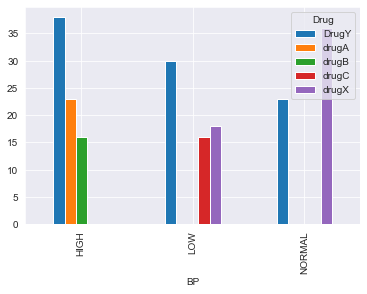

In [3]:
pd.crosstab(drug_df.BP,drug_df.Drug).plot(kind='bar');

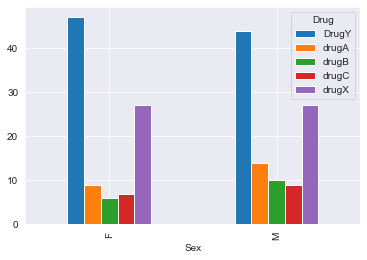

In [4]:
pd.crosstab(drug_df.Sex,drug_df.Drug).plot(kind='bar');

#### Feature Engineering

In [5]:
le= LabelEncoder()
drug_df['BP_encoded']=le.fit_transform(drug_df.BP)
drug_df['Cholesterol_encoded']=le.fit_transform(drug_df.Cholesterol)
drug_df['Sex_encoded']=le.fit_transform(drug_df.Sex)
drug_df['Drug_en']=le.fit_transform(drug_df.Drug)

In [6]:
X= drug_df[['Age', 'Na_to_K','BP_encoded', 'Cholesterol_encoded', 'Sex_encoded']]
y=drug_df['Drug_en']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

#### Modelling

In [8]:
clf = DecisionTreeClassifier(max_depth=3,criterion='entropy',random_state=0)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test)
print('accuracy score on training set: {:.2f}%'.format(clf.score(X_train,y_train)*100))
print('accuracy score on testing set: {:.2f}%'.format(clf.score(X_test,y_test)*100))

accuracy score on training set: 91.43%
accuracy score on testing set: 90.00%


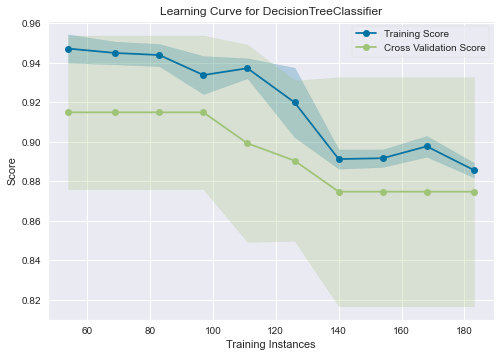

<AxesSubplot:title={'center':'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [18]:
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    clf, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [9]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

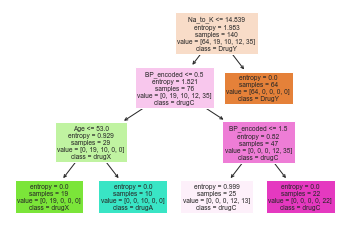

In [10]:
class_names=['DrugY','drugX','drugA','drugB','drugC']
tree.plot_tree(clf,
               feature_names = X.columns, 
               class_names=class_names,
               filled = True);

In [12]:
#from IPython.display import Image
#import pydotplus
#from sklearn.tree import export_graphviz

#def tree_graph_to_png(tree, feature_names, png_file_to_save):
    #"""
    #This requires GraphViz to be installed.  
    #"""
    
   #tree_str = export_graphviz(tree, feature_names=class_names, filled=True, out_file=None)
   #graph = pydotplus.graph_from_dot_data(tree_str)
    #graph.write_png(png_file_to_save)

#tree_graph_to_png(tree=clf,feature_names=["x1", "x2"],png_file_to_save="topic3_decision_tree1.png",)
#dot_data=StringIO()
#tree= export_graphviz(clf,out_file=dot_data,filled=True,feature_names=X.columns,class_names=class_names)
#graph =pydotplus.graph_from_dot_data(dot_data.getvalue())

#### Model Evaluation

Interpreting confusion matrix:
- True Positive: 
- True Negative: 
- False Positive:
- False Negative:

Precision: Out of all drugs prediction, how many we got correct.

Recall; Out of all drugs truth samples, how many we got correct.

In [12]:
print('Confusion matrix:\n {}'.format(confusion_matrix(y_pred,y_test)));
print('\nClassification Report:\n {}'.format(classification_report(y_pred,y_test)));

Confusion matrix:
 [[27  0  0  0  0]
 [ 0  4  2  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  4 19]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.67      0.80         6
           2       0.67      1.00      0.80         4
           3       0.00      0.00      0.00         0
           4       1.00      0.83      0.90        23

    accuracy                           0.90        60
   macro avg       0.73      0.70      0.70        60
weighted avg       0.98      0.90      0.93        60



In [38]:
#change the name of the encoders to the drug names
from yellowbrick.classifier import ROCAUC
def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'functional', 
                                        1: 'needs repair', 
                                        2: 'nonfunctional',
                                        3: 'Drugc',
                                        4: 'Drugd',
                                        5: 'Druge'
                                        })
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    
    return visualizer

The <b>Receiver Operating Characteristic curve (ROC) curve</b> is created by plotting the True Positive Rate(TPR) against the False Positive Rate(FPR) at various thresholds. The ROC tells us how well our model can distinguish between the classes. The True Positive Rate (sensitivity) is the Probability of correct detection while the False Positve Rate is the probability of incorrect detection.

ROC Curve for multi-class decision trees

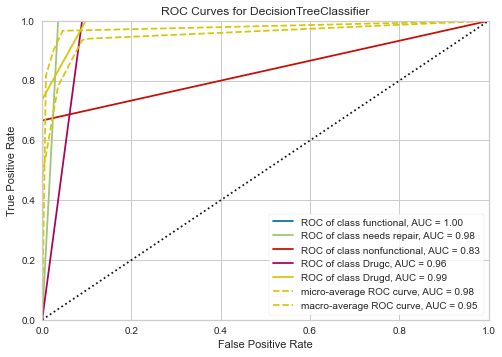

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'functional', 1: 'needs repair', 2: 'nonfunctional',
                3: 'Drugc', 4: 'Drugd', 5: 'Druge'},
       estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        random_state=0))

In [39]:
plot_ROC_curve(clf,X_train,y_train,X_test,y_test)

References: 

https://www.ibm.com/topics/decision-trees

https://www.kaggle.com/datasets/prathamtripathi/drug-classification

https://www.kaggle.com/code/caesarmario/85-drug-classification-w-various-ml-models

In [206]:
#pruning
#import numpy as np
#from sklearn.model_selection import ParameterGrid, GridSearchCV
#max_depth_grid_search = GridSearchCV(
    #estimator=DecisionTreeClassifier(random_state=42),
    #scoring='accuracy',
    #param_grid=ParameterGrid(
     #   {"max_depth":15}
    #),
#)